# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!unzip /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type.zip -d /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/

Archive:  /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type.zip
   creating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/
  inflating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/102013492.png  
  inflating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/150-Sweet-And-Short-Indian-Baby-Girl-Names-With-Meanings-624x702.jpg  
  inflating: /content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detect

# CNN Model for detecting Type Of Malnutrition

In [ ]:
dataset_dir = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type"

In [ ]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)

In [ ]:
dataset_dir

PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type')

In [ ]:
list(dataset_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/150-Sweet-And-Short-Indian-Baby-Girl-Names-With-Meanings-624x702.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/310a470e49ab80e8e66b0487f6bd5aa4.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/3524946.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/healthy/360_F_384316362_mHt4HRHUF3hYkcIAb9LFKhvHMqAgS014.jpg'),
 Posi

In [ ]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))

In [ ]:
print(image_count)

363


In [ ]:
healthy = len(list(dataset_dir.glob('healthy/*')))

In [ ]:
healthy

165

In [ ]:
kwashiorkor = len(list(dataset_dir.glob('kwashiorkor/*')))

In [ ]:
kwashiorkor

112

In [ ]:
marasmus = len(list(dataset_dir.glob('marasmus/*')))

In [ ]:
marasmus

100

In [ ]:
marasmus_img_list = list(dataset_dir.glob('marasmus/*'))

In [ ]:
marasmus_img_list[:10]

[PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/marasmus/1026951-1970812163.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/marasmus/1-148.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/marasmus/11898935_892656900830108_386940796887300718_n-3.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/marasmus/166-1.jpg'),
 PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapip

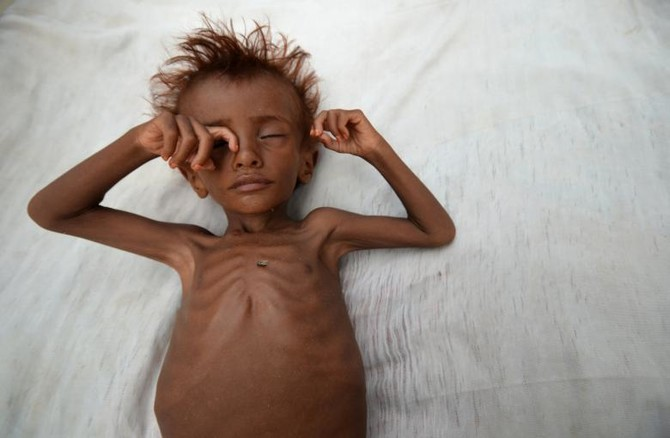

In [ ]:
PIL.Image.open(str(marasmus_img_list[0]))

In [ ]:
kwashiorkor_img_list = list(dataset_dir.glob('kwashiorkor/*'))

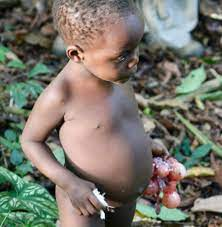

In [ ]:
PIL.Image.open(str(kwashiorkor_img_list[8]))

In [ ]:
malnutrition_type_paths_dict = {
    "healthy" : list(dataset_dir.glob('healthy/*')),
    "kwashiorkor" : list(dataset_dir.glob('kwashiorkor/*')),
    "marasmus" : list(dataset_dir.glob('marasmus/*'))
}

In [ ]:
malnutrition_type_labels_dict = {
    "healthy" : 0,
    "kwashiorkor" : 1,
    "marasmus" : 2
}

In [ ]:
malnutrition_type_paths_dict["kwashiorkor"][10]

PosixPath('/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/kwashiorkor/download.jpg')

In [ ]:
str(malnutrition_type_paths_dict["kwashiorkor"][10])

'/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/malnutrition_dataset_enhanced/malnutrition_type/kwashiorkor/download.jpg'

In [ ]:
kwashiorkor_img = cv2.imread(str(malnutrition_type_paths_dict["kwashiorkor"][7]))
kwashiorkor_img

array([[[255, 252, 255],
        [255, 252, 255],
        [255, 252, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 254, 254],
        [255, 254, 254],
        [255, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[252, 254, 255],
        [252, 254, 254],
        [253, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 254, 255],
        [252, 254, 255],
        [253, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 253, 255],
        [254, 253, 255],
        [255, 254, 255],
        ...,
        [254, 254, 254],
        [253, 255, 255],
        [253, 255, 255]]

In [ ]:
print(kwashiorkor_img.shape)

(1035, 672, 3)


In [ ]:
cv2.resize(kwashiorkor_img, (180, 180)).shape

(180, 180, 3)

In [ ]:
for malnutrition_category, images_path in malnutrition_type_paths_dict.items():
    print(malnutrition_category)
    print(len(images_path))

healthy
165
kwashiorkor
112
marasmus
100


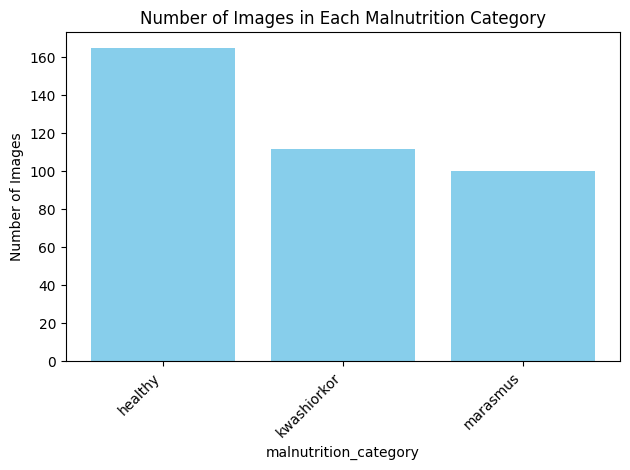

In [ ]:
import matplotlib.pyplot as plt

skin_categories = ['healthy', 'kwashiorkor', 'marasmus']
image_counts = [165, 112, 100]

# Plotting the bar chart
plt.bar(skin_categories, image_counts, color='skyblue')
plt.xlabel('malnutrition_category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Malnutrition Category')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()

# Showing the plot
plt.show()

In [ ]:
X, y = [], []

for malnutrition_category, images_path in malnutrition_type_paths_dict.items():
    for image_path in images_path:
        img = cv2.imread(str(image_path))
        try:
          resized_img = cv2.resize(img, (180, 180))
          X.append(resized_img)
          y.append(malnutrition_type_labels_dict[malnutrition_category])
        except:
          continue

In [ ]:
X = np.array(X)
y = np.array(y)

# Splitting the dataset (80 % - Train, 20 % - Test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
len(X_train)

298

In [ ]:
len(X_test)

75

In [ ]:
X_train[1]

array([[[ 17,  22,  20],
        [ 24,  27,  25],
        [ 36,  39,  37],
        ...,
        [105, 158, 118],
        [ 68, 124,  83],
        [ 73, 125,  85]],

       [[ 21,  26,  24],
        [ 26,  29,  27],
        [ 25,  28,  26],
        ...,
        [ 73, 110,  76],
        [ 82, 109,  76],
        [146, 173, 140]],

       [[ 24,  29,  27],
        [ 21,  24,  22],
        [ 25,  28,  26],
        ...,
        [152, 179, 146],
        [140, 168, 135],
        [ 85, 117,  86]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

# Scaling the numpy arrays representing the images in the training & testing dataset (Just divide X_train & X_test by 255, after that all the values that you would have in the arrays would be between 0 to 1 & not 0 to 255 as they were before scaling)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[1].shape

(180, 180, 3)

In [ ]:
X_test_scaled[1].shape

(180, 180, 3)

# Training the CNN Model

In [ ]:
num_classes = 3

model = Sequential([
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 3 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'healthy' & similarly the activation of any of the other 2 neurons would indicate the class being 'kwashiorkor' or 'marasmus'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 [==============================] - 6s 108ms/step - loss: 1.3210 - accuracy: 0.4195 - val_loss: 1.1214 - val_accuracy: 0.3067
Epoch 2/100
10/10 [==============================] - 0s 27ms/step - loss: 0.9046 - accuracy: 0.5604 - val_loss: 0.8601 - val_accuracy: 0.5733
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.6819 - accuracy: 0.6946 - val_loss: 0.7726 - val_accuracy: 0.6400
Epoch 4/100
10/10 [==============================] - 0s 28ms/step - loss: 0.5182 - accuracy: 0.7718 - val_loss: 0.8855 - val_accuracy: 0.5733
Epoch 5/100
10/10 [==============================] - 0s 23ms/step - loss: 0.3953 - accuracy: 0.8523 - val_loss: 0.8469 - val_accuracy: 0.7067
Epoch 6/100
10/10 [==============================] - 0s 24ms/step - loss: 0.3348 - accuracy: 0.8792 - val_loss: 0.8912 - val_accuracy: 0.6533
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 0.2204 - accuracy: 0.9329 - val_loss: 1.0945 - val_accuracy: 0.7200
Epoch

# Malnutrition type for babies CNN Model Graphs & Model Architecture

### Training & Validation Data Loss & Accuracy Graphs of the CNN model developed for predicting malnutrition type for babies

### Model Architecture diagram

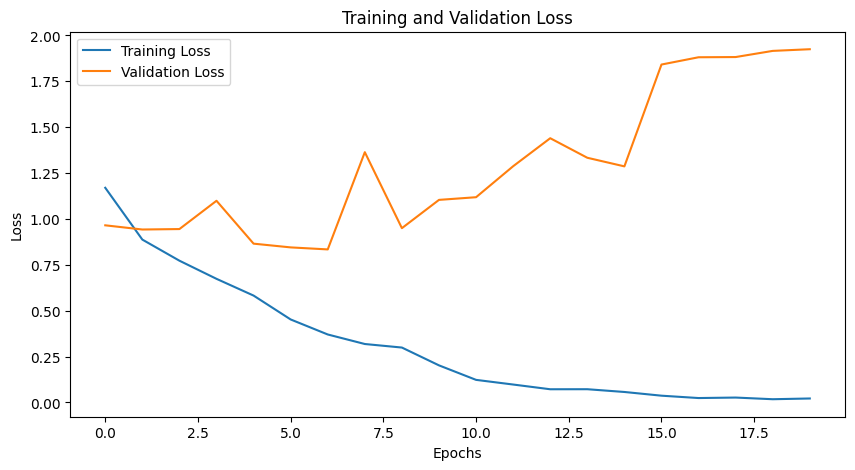

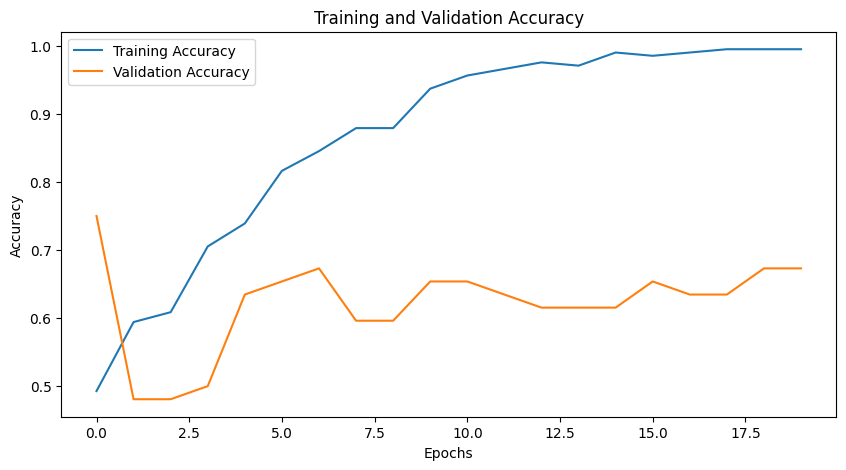

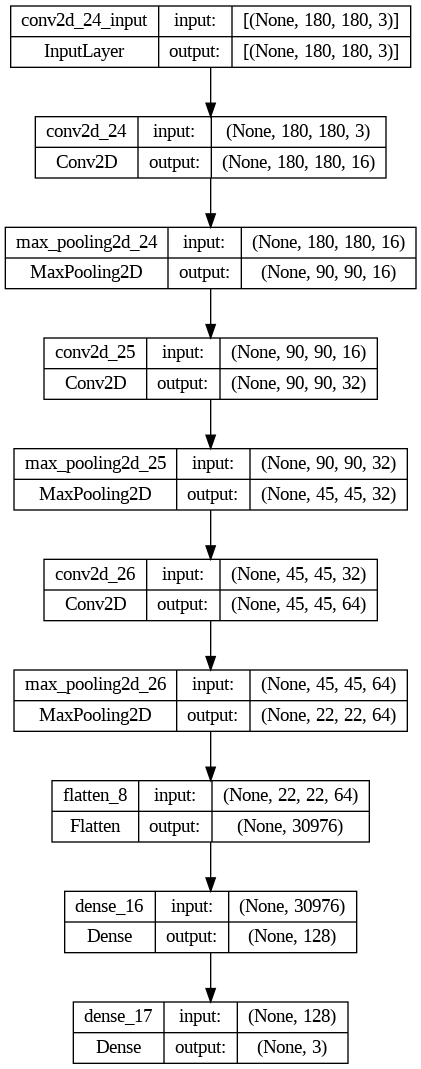

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

2/2 [==============================] - 0s 17ms/step - loss: 1.9251 - accuracy: 0.6731


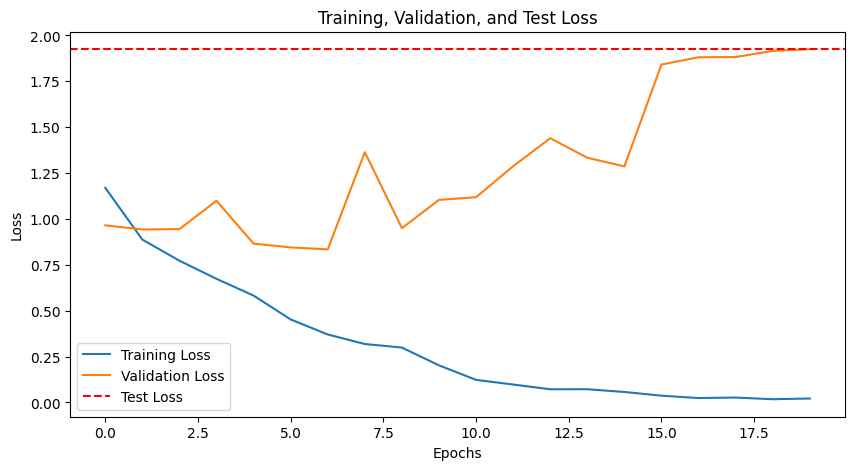

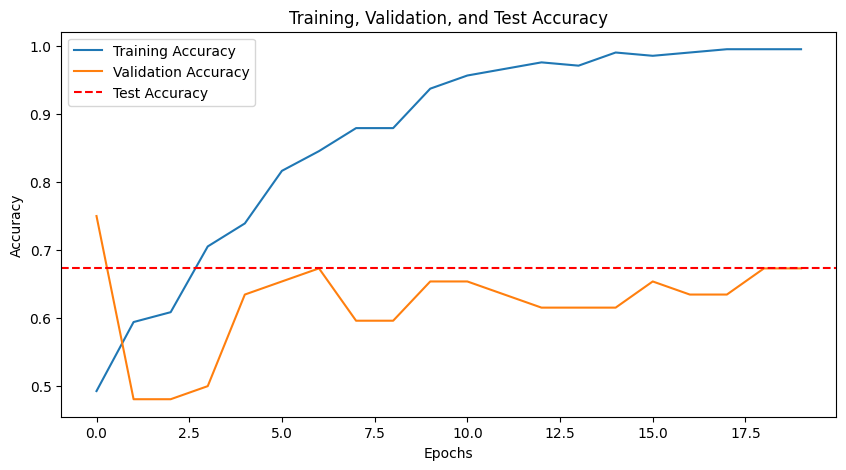

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 67.31 % Accuracy has been obtained for the CNN model trained for predicting Malnutrition type for babies on test data

2/2 [==============================] - 0s 13ms/step


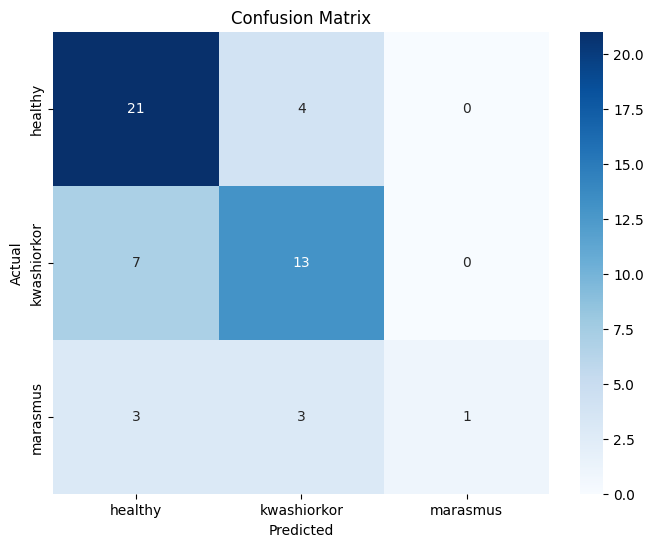

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=malnutrition_type_labels_dict.keys(),
            yticklabels=malnutrition_type_labels_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predictions for the entire test dataset, showing the the confidence score (possibilities) of every sample / image of the test dataset belonging to the 3 different classes that we have in our malnutrition_type dataset.

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

2/2 [==============================] - 0s 11ms/step


array([[ 6.01360142e-01,  9.36602652e-02, -2.11949372e+00],
       [ 1.33751936e+01, -7.45838118e+00, -9.36221981e+00],
       [-3.72269678e+00,  2.37296391e+00,  1.40635645e+00],
       [ 2.27007141e+01, -5.46365499e+00, -1.77831573e+01],
       [ 9.69507122e+00,  1.33636081e+00, -9.65110207e+00],
       [ 3.64766574e+00,  6.80524302e+00, -6.46879959e+00],
       [ 4.21795845e+00,  2.03149700e+00, -6.18862295e+00],
       [ 4.24705839e+00, -9.03223991e-01, -4.11141157e+00],
       [ 1.07794642e+00,  1.81847656e+00, -3.01519489e+00],
       [-2.60567546e+00,  2.79357862e+00,  3.54457974e-01],
       [ 5.55296004e-01,  1.11676741e+00, -5.21851540e-01],
       [ 6.41221237e+00,  4.44121742e+00, -6.90431547e+00],
       [ 3.30104589e-01, -1.42118561e+00, -5.75320601e-01],
       [ 7.19951105e+00, -2.80744052e+00, -6.11288166e+00],
       [ 1.21420491e+00,  5.63589573e+00, -4.58486700e+00],
       [ 7.84164965e-01,  1.69857998e+01, -7.49027395e+00],
       [ 4.55834627e+00, -5.89739680e-01

# Checking the class of the 25th sample in the test dataset

In [ ]:
score = tf.nn.softmax(predictions[24])
score

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.01798809, 0.9770001 , 0.00501184], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[24]

1

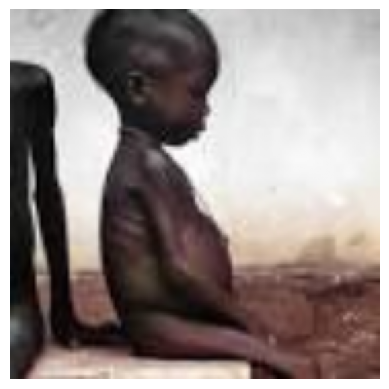

In [ ]:
# Displaying the BGR image using Matplotlib
plt.imshow(X_test_scaled[24][:, :, ::-1])  # Reversing the order (BGR to RGB) for display
plt.axis('off')  # Turning off axis labels and ticks
plt.show()

# The baby in the above image is having kwashiorkor, so the prediction made for 25th image which was class index 1 (kwashiorkor) in the test dataset is correct

# Number of images & labels in the test dataset (X_test_scaled (test image) & y_test (test image label))

In [ ]:
X_test_scaled.shape

(52, 180, 180, 3)

In [ ]:
y_test.shape

(52,)

# The test dataset contains 52 images numbered with numbers from 0 to 51

In [ ]:
input_test_image = int(input("Enter a number between 0 and 52 (excluding 52), this number represents which sample image you want to pick from the test dataset : "))

Enter a number between 0 and 52 (excluding 52), this number represents which sample image you want to pick from the test dataset : 13


Predicted Index: 0
Actual Index: 0
Predicted Class Name: healthy


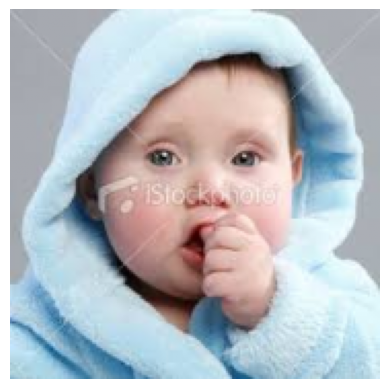

In [ ]:
# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = y_test[input_test_image]

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in malnutrition_type_labels_dict.items() if index == predicted_index][0]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in malnutrition_type_labels_dict.items() if index == actual_index][0]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")

# Display the BGR image using Matplotlib
plt.imshow(X_test_scaled[input_test_image][:, :, ::-1])  # Reverse the order (BGR to RGB) for display
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


# As we can see in the above generated output the image at index 13 (which means the 14th image in the test dataset) is a healthy baby's image & it's actual & predicted class index are the same which is 0 (which means healthy class), so the prediction made by the created CNN model is correct

# Saving the created CNN model for which we obtained 67.31 % accuracy on test data

In [ ]:
# Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models/malnutrition_type_CNN_model/'

In [ ]:
# Save the model
model.save(save_model_folder + 'malnutrition_type_classification_first_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the saved CNN model


In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models/malnutrition_type_CNN_model/malnutrition_type_classification_first_CNN_model.h5"

# Load the model
loaded_model = load_model(saved_model_path)


# Using the saved model after loading it to make predictions on unseen image

# Downloading an image from google to test the model

In [ ]:
!pip install requests

In [ ]:
import requests
from google.colab import drive

# URL of the image to download
image_url = 'https://ars.els-cdn.com/content/image/3-s2.0-B9780123864567020165-f02016-10-9780123864567.jpg'

# Define the path to your desired folder in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/'

# Send a GET request to download the image
response = requests.get(image_url)

# Save the image to your Google Drive folder
with open(image_path + 'malnutrition_type_baby_image.jpg', 'wb') as f:
    f.write(response.content)


# Use the loaded model to predict the class of the image downloaded from the internet

In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/malnutrition_type_baby_image.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in malnutrition_type_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 37ms/step
Predicted Class: kwashiorkor


# Displaying the downloaded image for which the class was predicted using the created CNN model

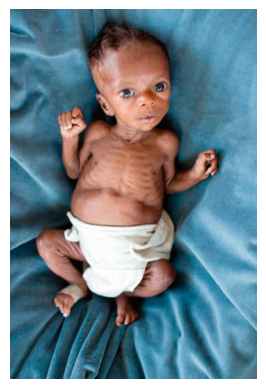

In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/malnutrition_type_baby_image.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# As we can see the image that was downloaded is of a baby with kwashiorkor & the prediction obtained for this image using our CNN Model is also kwashiorkor, This demonstrates the effectiveness of the created CNN model in distinguishing between healthy & malnourished babies

<hr>
<hr>

# Training Model After Data Augmentation


In [ ]:
img_height = 180
img_width = 180

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation, # the first layer is augmentation which produces new samples
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Dropout(0.2), # The dropout layer would drop 20 % of the neurons at random from every layer in each pass, giving us better generalisation so that we can avoid overfitting
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 4 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'marigold_fresh' & similarly the activation of the other 3 neurons would indicate the class being 'marigold_decayed', 'hibiscus_fresh', 'hibiscus_decayed'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
10/10 [==============================] - 2s 69ms/step - loss: 1.9942 - accuracy: 0.2953 - val_loss: 1.1049 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 0s 36ms/step - loss: 1.1016 - accuracy: 0.4027 - val_loss: 1.0552 - val_accuracy: 0.4800
Epoch 3/100
10/10 [==============================] - 0s 31ms/step - loss: 1.0782 - accuracy: 0.4262 - val_loss: 1.0217 - val_accuracy: 0.4800
Epoch 4/100
10/10 [==============================] - 0s 37ms/step - loss: 1.0492 - accuracy: 0.4228 - val_loss: 1.0882 - val_accuracy: 0.5733
Epoch 5/100
10/10 [==============================] - 0s 32ms/step - loss: 1.0319 - accuracy: 0.4597 - val_loss: 0.9451 - val_accuracy: 0.5333
Epoch 6/100
10/10 [==============================] - 0s 31ms/step - loss: 0.9923 - accuracy: 0.5235 - val_loss: 0.9064 - val_accuracy: 0.5867
Epoch 7/100
10/10 [==============================] - 0s 33ms/step - loss: 0.8909 - accuracy: 0.5671 - val_loss: 0.9823 - val_accuracy: 0.5867
Epoch 

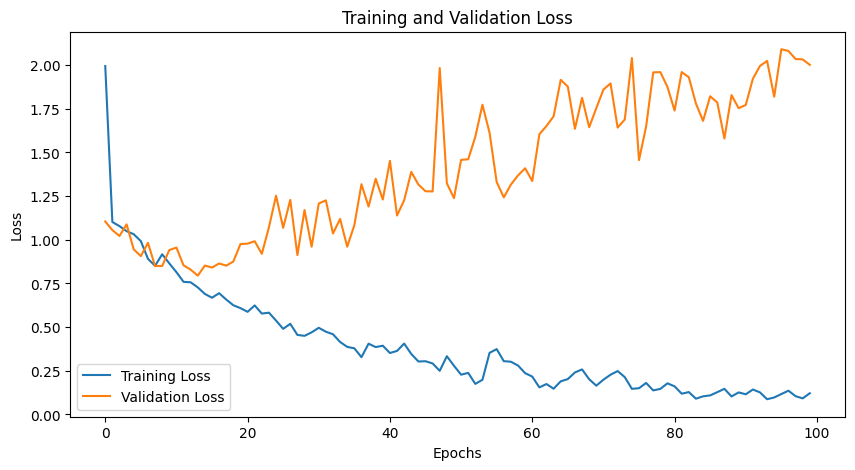

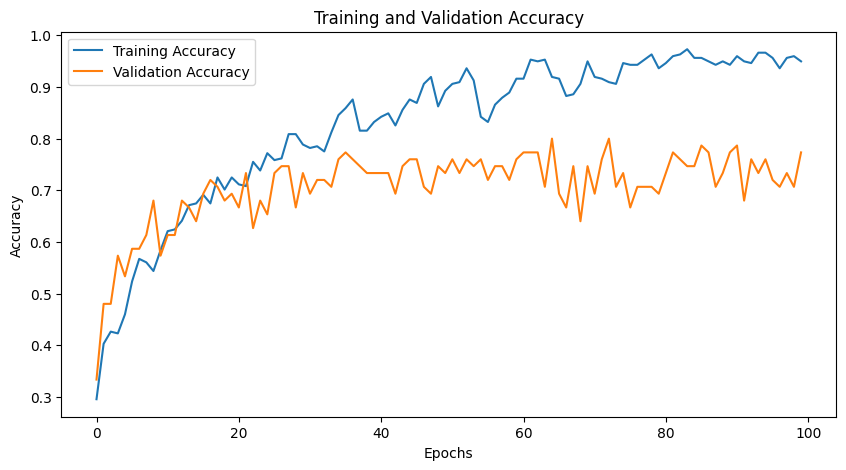

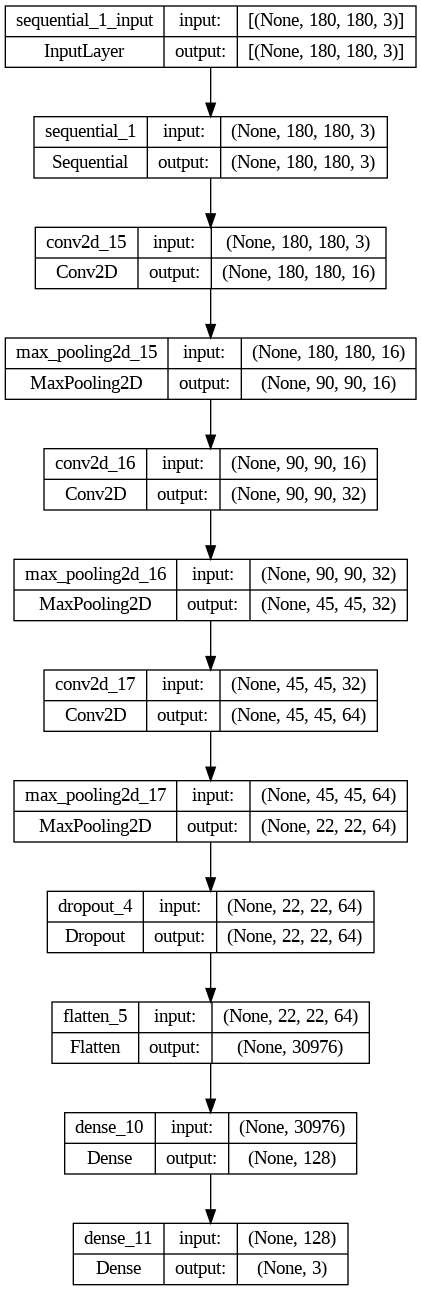

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

3/3 [==============================] - 0s 11ms/step - loss: 2.0013 - accuracy: 0.7733


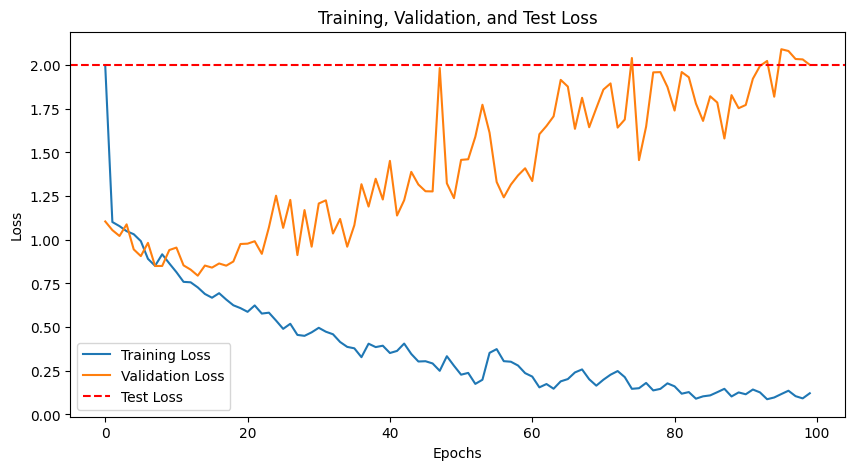

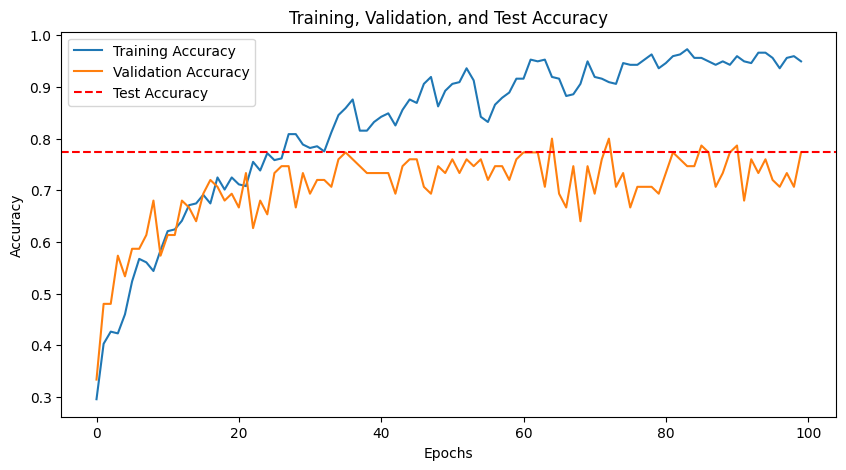

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Plot the training, validation, and testing loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training, validation, and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 8ms/step


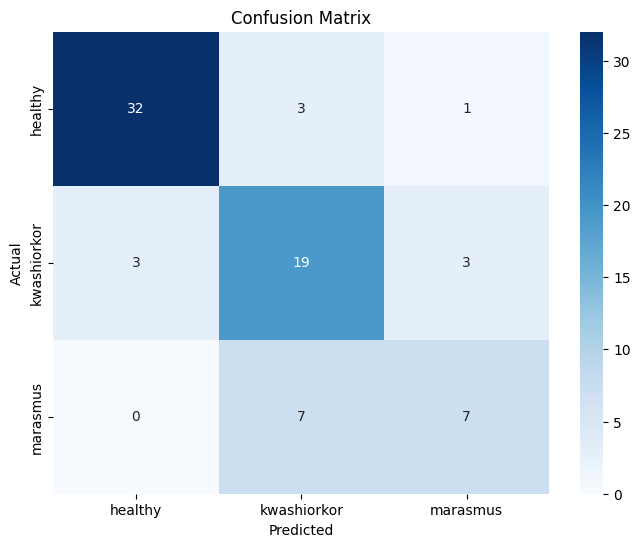

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=malnutrition_type_labels_dict.keys(),
            yticklabels=malnutrition_type_labels_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models_Enhanced_Accuracies/malnutrition_type_enhanced_model/'

In [ ]:
# Save the model
model.save(save_model_folder + 'malnutrition_type_classification_enhanced_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/CNN_Models_Enhanced_Accuracies/malnutrition_type_enhanced_model/malnutrition_type_classification_enhanced_CNN_model.h5"

# Load the model
loaded_model = load_model(saved_model_path)

In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/malnutrition_type_baby_image.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in malnutrition_type_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 356ms/step
Predicted Class: marasmus


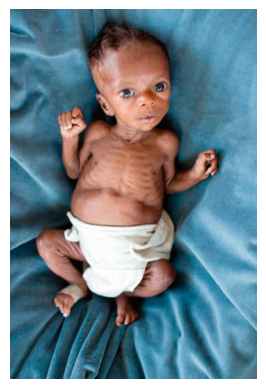

Predicted Class: marasmus


In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/projects_to_work_on/December_2023/Mediapipe_For_Malnutrition_Detection_In_Infants/CNN_for_deficiencies_complete/downloaded_test_images_for_CNNs/malnutrition_type_baby_image.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Display the predicted class
for class_name, class_label in malnutrition_type_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")
